# Setup libraries and load data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import missingno as msno
import os
import matplotlib.pyplot as plt
import ppscore as pps
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [ ]:
train_og = pd.read_csv("./train.csv")
stores = pd.read_csv("./stores.csv")
test_og = pd.read_csv("./test.csv")
features = pd.read_csv("./features.csv")
sample_submission = pd.read_csv("./sampleSubmission.csv")

In [ ]:
#We will use store_features in train and test, so we will treat it, then merge with both afterwards
store_features = features.merge(stores, how='left', on='Store')

# Treatment Phase

In [6]:
#Format datafield and use it to create Week and Year features
store_features.Date = pd.to_datetime(store_features.Date)

In [60]:
store_features['Week'] = store_features.Date.dt.week 
store_features['Year'] = store_features.Date.dt.year
store_features = store_features.drop(["Date"],axis=1)

In [10]:
#Make IsHoliday into 0 and 1
store_features["IsHoliday"] = store_features["IsHoliday"].astype(int)

In [ ]:
#Break Type into dummies
type_dummies = pd.get_dummies(store_features["Type"])
type_dummies = type_dummies.drop(["C"], axis = 1)

store_features = store_features.append(type_dummies).drop(["Type"], axis=1)

In [12]:
#Replace NaN with zero
store_features = store_features.fillna(0)

In [14]:
train_og.Date = pd.to_datetime(train_og.Date)
train_og["IsHoliday"] = train_og["IsHoliday"].astype(int)
train = train_og.merge(store_features, how='inner', on=['Store','Date','IsHoliday'])

In [21]:
test_og.Date = pd.to_datetime(test_og.Date)
test_og["IsHoliday"] = test_og["IsHoliday"].astype(int)
test = test_og.merge(store_features, how='inner', on=['Store','Date','IsHoliday'])

# Exploration Phase

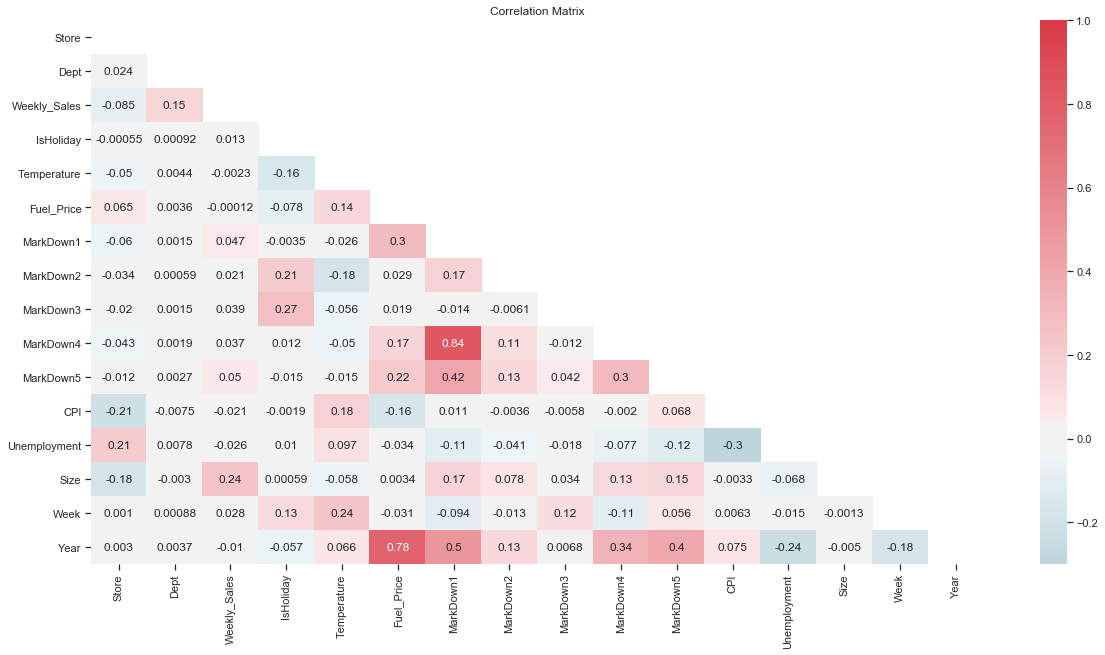

In [47]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 10))
plt.title('Correlation Matrix')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True)

plt.show()

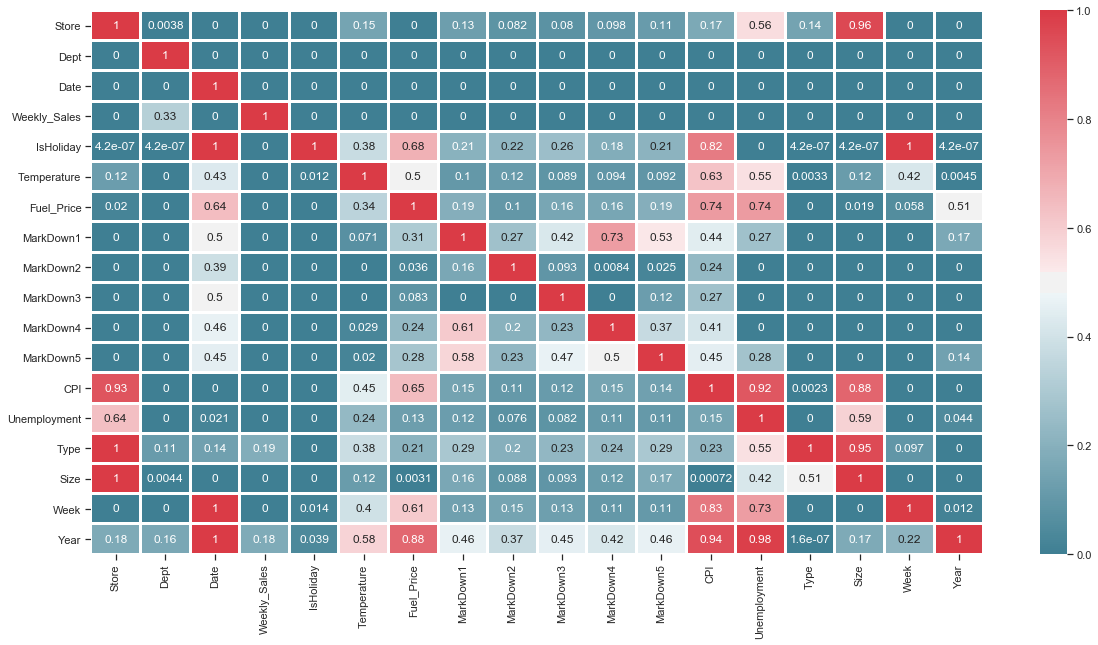

In [59]:
plt.figure(figsize=(20, 10))
sns.heatmap(pps.matrix(train), vmin=0, vmax=1, cmap=cmap, linewidths=2, annot=True)

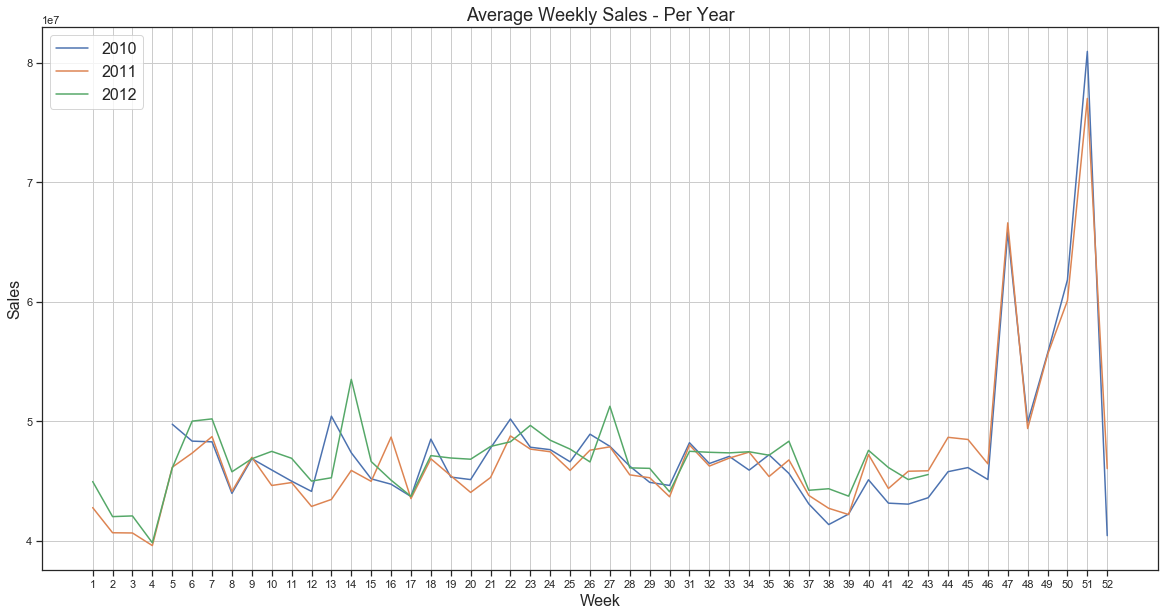

In [48]:
weekly_sales_2010 = train[train.Year==2010]['Weekly_Sales'].groupby(train['Week']).sum()
weekly_sales_2011 = train[train.Year==2011]['Weekly_Sales'].groupby(train['Week']).sum()
weekly_sales_2012 = train[train.Year==2012]['Weekly_Sales'].groupby(train['Week']).sum()

plt.figure(figsize=(20, 10))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales - Per Year', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

In [ ]:
weekly_sales = train['Weekly_Sales'].groupby(train['Store']).mean()
plt.figure(figsize=(20,8))
sns.barplot(weekly_sales.index, weekly_sales.values)
plt.grid()
plt.title('Average Sales - per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

# Modeling Phase

In [ ]:
X = df[stor_cols+date_cols+exte_cols+mark_cols]
y = df[target]

In [ ]:
#split sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Feature Selection Phase
